# Note :- Make sure you have a good internet connection

In [1]:
#import of some libraries
from bs4 import BeautifulSoup
from selenium import webdriver
import sys
from selenium.common.exceptions import NoSuchElementException
import time
import numpy as np
import matplotlib.pyplot as plt
import operator
import pandas as pd
from selenium.common.exceptions import NoSuchElementException

In [2]:
#some important functions needed time to time

#Searchbartext helps us to write the text in the search bar.It first find the search bar
#and then click on the search bar and the send the text by finding the searchbartext element by classname
def Searchbartext(text):
    search_bar = driver.find_element_by_class_name("eyXLr.wUAXj")
    search_bar.click()
    search_bar_text = driver.find_element_by_class_name("XTCLo.x3qfX")
    search_bar_text.send_keys(text)

#clearSearch helps us to erase the text from the seachbar and close the searchbar
def clearSearch():
    search_bar_text = driver.find_element_by_class_name("XTCLo.x3qfX")
    search_bar_text.clear()
    close = driver.find_element_by_class_name('aIYm8.coreSpriteSearchClear')
    close.click()

#closefollowerswindow helps us to close the followers window by find the class of close and by clicking on it
def closefollowerswindow():
    close_followers = driver.find_elements_by_class_name("wpO6b")[1]
    close_followers.click()

# find and return the class element of username
def find_and_return_element_of_username(username):
    helper = driver.find_elements_by_class_name("yCE8d")
    for handle in helper:
        if username == handle.text.split('\n')[0]:
            return handle
    
# get the followers of the particular insta handle
def get_followers():
    no_of_followers = driver.find_elements_by_class_name('g47SY')
    no_of_user_followers = int(no_of_followers[1].get_attribute('title').replace(',',''))
    return no_of_user_followers

# Login to your Instagram Handle 

In [3]:
#opening the driver
driver = webdriver.Chrome(executable_path="D:/PEC/Coding ninjas/Data Science/WebScraping/chromedriver")
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="a6193cf4106dbe522b48df24e950f066")>

In [4]:
#opening the instagram login page
driver.get("https://www.instagram.com/accounts/login")
driver.implicitly_wait(10)

In [5]:
#finding the username and password input by the class name
username = driver.find_elements_by_class_name("_2hvTZ.pexuQ.zyHYP")
driver.implicitly_wait(10)

In [6]:
username

[<selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="c163fe5a-4172-4511-a33f-ec475d4ed87f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="d9eaa852-82eb-4263-bc71-360673598e85")>]

### 1.1 Submit your username and password

### Enter your username and password in the next cell

In [7]:
# sending usename and the password
username[0].send_keys("SAMPLE USERNAME")#enter your username
username[1].send_keys("SAMPLE PASSWORD")#enter your password

In [8]:
# getting the login btn class and clicking on the login btn
loginbtn = driver.find_element_by_class_name("sqdOP.L3NKy.y3zKF")
loginbtn.click()
time.sleep(10)

In [9]:
# getting the save info class and clicking on save info btn
time.sleep(2)
save_info = driver.find_element_by_class_name("sqdOP.yWX7d.y3zKF")
save_info.click()
driver.implicitly_wait(10)

In [10]:
# getting the notifications turn on class and clicking on turn on btn
notifications_turn_on = driver.find_element_by_class_name("aOOlW.HoLwm")
notifications_turn_on.click()
driver.implicitly_wait(10)

# Type for “food” in search bar and print all the names of the Instagram Handles that are displayed in list after typing “food”

In [11]:
# calling function Searchbartext and filling food in the search bar
Searchbartext('food')

In [12]:
# getting all the elements of the food handles that appear after writting food in the search bar
food_handles = driver.find_elements_by_class_name("uyeeR")[:10]
food_handles

[<selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="0c20a742-fbde-4ba9-a4d8-9d3983202695")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="116f7704-d6d9-47eb-8da5-cb0bdeeb2502")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="2955a0bd-7c09-4d94-bddc-a37867c62ba5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="eb3ceb37-2a54-4a68-903d-d2da08c652a7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="6f14ddd2-462a-4d5c-b800-341b47716283")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="e7a3744b-aba0-4550-bd4d-56dbd6e8b744")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a6193cf4106dbe522b48df24e950f066", element="a550476c-fe8e-42d5-8aca-45

In [13]:
# Storing the insta usernames in the list with the help of first for loop and then printing the insta usernames in the second
# for loop and avoinding the printing of hashtags
li_insta_handles = []
for handle in food_handles:
    li_insta_handles.append(handle.text.split('\n')[0])
for handle in li_insta_handles:
    print(handle)

foodtalkindia
dilsefoodie
food_lunatic
street_food_chandigarh
gastronome101
delhifoodguide
food
thaparfoodfestival
foodconnection.world
yourfoodlab


In [14]:
# calling function clearSearch() and clearing the search bar and closing it
clearSearch()

# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

## 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers


In [15]:
# creating a list which will store a tuple of username and followers
list_of_usernames_and_followers = []
# looping over the usernames of first 10 that we stored in li_insta_handles
for username in li_insta_handles:
    followers = 0
    # searching the username in the serachbar
    Searchbartext(username)
    # finding the class element of the username by calling find_and_return_element_of_username() function
    usernamer = find_and_return_element_of_username(username)
    # clicking on the username
    usernamer.click()
    # stopping for 5 seconds
    time.sleep(5)
    # getting the number of followers of the particular username by callingnumber get_followers function
    followers = get_followers()
    # appending the username and the number of followers in the list_of_usernames_and_followers list
    list_of_usernames_and_followers.append((username,followers))
    # stopping for 1 second
    time.sleep(1)
    

In [16]:
# printitng the list_of_usernames_and_followers
print(*list_of_usernames_and_followers)

('foodtalkindia', 302778) ('dilsefoodie', 657105) ('food_lunatic', 101334) ('street_food_chandigarh', 82590) ('gastronome101', 2229) ('delhifoodguide', 104439) ('food', 91373) ('thaparfoodfestival', 2489) ('foodconnection.world', 60) ('yourfoodlab', 1459248)


In [17]:
# sorting list_of_usernames_and_followers on the basis of number of followers in decresing order and converting it into np array
top10_handles = np.array(sorted(list_of_usernames_and_followers, key = lambda x: x[1])[::-1])
# extracting the top5 handles and storing it in top5_handles
top5_handles = top10_handles[:5]
# looping over top5_handles and printing the usernames and the number of followers
for handles in top5_handles:
    print(handles[0],handles[1])

yourfoodlab 1459248
dilsefoodie 657105
foodtalkindia 302778
delhifoodguide 104439
food_lunatic 101334


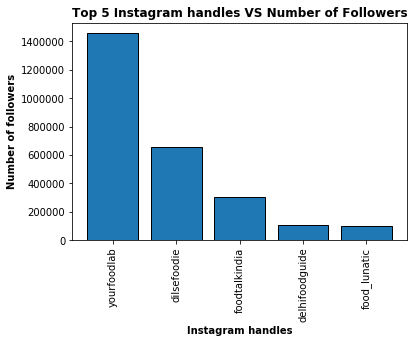

In [18]:
# extracting the usernames of top5_handles and saving it in top5_handles0
top5_handles0 =top5_handles[:,0]
# extracting the followers from top5_handles and converting them to int and storing them in top5_handles_followers
top5_handles_followers = np.array(top5_handles[:,1],dtype=int)
# ploting the bar graph 
plt.bar(top5_handles0,top5_handles_followers,edgecolor="black")
# displaying the title
plt.title('Top 5 Instagram handles VS Number of Followers',fontweight="bold")
# displaying x-label
plt.xlabel('Instagram handles',fontweight="bold")
# displaying y-label
plt.ylabel('Number of followers',fontweight="bold")
# doing the rotation=90 of x-axis labels
plt.xticks(rotation=90)
# showing the bar graph
plt.show()

## 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [19]:
# making the list li_posts_and_username which stores the number of posts doing in previous 3 days and the username
li_posts_and_username = []
# li_helper helps to find whether post is of previous 3 days or not
li_helper = ["HOURS","MINUTES","SECONDS","HOUR","MINUTE","HOUR","DAY","SECOND"]
# looping over usernames of top5_handles
for username in top5_handles[:,0][::-1]:
    # searching the username in the serachbar
    Searchbartext(username)
    # finding the class element of the username by calling find_and_return_element_of_username() function
    usernamer = find_and_return_element_of_username(username)
    # clicking on the username
    usernamer.click()
    # stopping for 2 sec
    time.sleep(2)
    # extracting the posts elements and saving it in posts 
    posts = driver.find_elements_by_class_name('v1Nh3.kIKUG._bz0w')
    # count helps to count the number of posts in previous 3 days
    count = 0
    # looping over single element in the posts
    for post in posts:
        # clicking on the post on by one
        driver.implicitly_wait(10)
        # clicking on the post on by one
        post.click()
        # implicitly waiting for 10 sec
        driver.implicitly_wait(10)
        # finding the date of post of how previous is the post like 2 days ago or 4 HOURS ago
        date = driver.find_element_by_class_name('_1o9PC.Nzb55').text.split(' ')
        # checking if date[1] is in li_helper
        if date[1] in li_helper:
            # increasing the count by 1 as the post is within the previous 3 days
            count+=1
        # checking if date[1] is 'DAYS'
        elif date[1]=="DAYS":
            # checking if date[0] is '1' or '2' or '3' 
            if date[0]=="1" or date[0]=="2" or date[0]=="3":
                # increasing the count by 1 as the post is within the previous 3 days
                count+=1
            # if date[0] is not '1' or '2' or '3'   
            else:
                # closing the post window and breaking out of loop of posts as
                # all the posts after that will be of more than 3 days before
                close = driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG")
                close.click()
                break
        else:
            # closing the post window and breaking out of loop of posts as
            # all the posts after that will be of more than 3 days before
            close = driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG")
            close.click()
            break
        # closing the post window
        close = driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG")
        close.click()
        # stopping for 1 sec
        time.sleep(1)
    # appending the username and the count in li_posts_and_username
    li_posts_and_username.append((username,count))
    # stopping for 2 sec 
    time.sleep(2)

In [20]:
# sorting the li_posts_and_username on the basis of number of posts
list_of_posts_of_top5 = np.array(sorted(li_posts_and_username, key = lambda x: x[1]))
# printing the username and the number of posts
for handle in list_of_posts_of_top5:
    print(handle[0],handle[1])

delhifoodguide 0
food_lunatic 4
foodtalkindia 4
dilsefoodie 4
yourfoodlab 8


## 1.3 Depict this information using a suitable graph

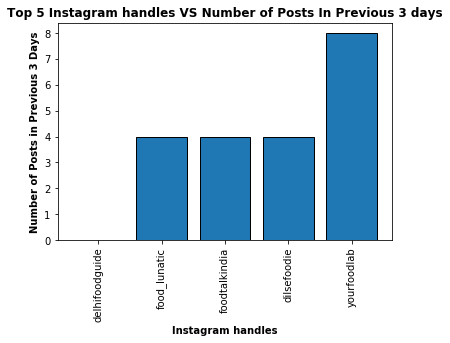

In [21]:
# extracting the usernames from list_of_posts_of_top5
list_of_usernames = list_of_posts_of_top5[:,0]
# extracting the number of posts from list_of_posts_of_top5 and converting it into int 
list_of_counts = np.array(list_of_posts_of_top5[:,1],dtype=int)
# ploting the bar graph
plt.bar(list_of_usernames,list_of_counts,edgecolor="black")
# displaying the title
plt.title('Top 5 Instagram handles VS Number of Posts In Previous 3 days',fontweight='bold')
# displaying x-label
plt.xlabel('Instagram handles',fontweight='bold')
# displaying y-label
plt.ylabel('Number of Posts in Previous 3 Days',fontweight='bold')
# doing the rotation=90 of x-axis labels
plt.xticks(rotation=90)
# showing the bar graph
plt.show()

# 2. Your friend also needs a list of hashtags that he should use in his posts.

## 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [22]:
# intialising the dictionary of words that includes all the word the @ and the # also
dictionary_of_words = {}
# intialising the dictionary of hastags that includes only # 
dictionary_of_hastags = {}
for username in top5_handles[:,0][::-1]:
    # searching the username in the serachbar
    Searchbartext(username)
    # finding the class element of the username by calling find_and_return_element_of_username() function
    usernamer = find_and_return_element_of_username(username)
    # clicking on the username
    usernamer.click()
    # stopping for 2 seconds
    time.sleep(2)
    # taking out the first 10 post elements
    posts = driver.find_elements_by_class_name("v1Nh3.kIKUG._bz0w")[:10]
    for post in posts:
        # clicking on the post on by one
        post.click()
        # implicitly waiting for 10 sec
        driver.implicitly_wait(10)
        # finding the caption element
        class0 = driver.find_element_by_class_name('C4VMK')
        # extracting the innerHTML and getting the data ready to scrape using BeautifulSoup
        data = BeautifulSoup(class0.get_attribute('innerHTML'),'html.parser')
        # getting the caption message in the text and spliting on the basis of space
        text = data.find(class_="").text.split(' ')
        # looping over text and saving the word and it's count in dictionary_of_words
        for content in text:
            dictionary_of_words[content]=dictionary_of_words.get(content,0)+1
        # finding all 'a' tags in the caption and chosing the #'s and storing the #'s and it's count in dictionary_of_hastags
        for hastag in data.find_all('a'):
            if "#" in hastag.text:
                dictionary_of_hastags[hastag.text] = dictionary_of_hastags.get(hastag.text,0)+1
        # closing the post
        close = driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG")
        close.click()
        # stopping for 1 second
        time.sleep(1)

## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [23]:
# storing dictionary_of_words on the basis of count and converting it into list.
list_of_words = (sorted(dictionary_of_words.items(),key=operator.itemgetter(1),reverse=True))
# printing the words and their counts.
for word in list_of_words:
    print(*word)

the 68
and 66
to 37
a 33
I 26
your 24
for 23
with 22
is 20
on 19
you 19
of 17
this 17
recipe 17
by 15
out 14
in 13
it 13
at 11
an 11
all 9
from 8
so 8
have 8
these 8
amazing 8
& 8
can 7
my 7
be 7
To 7
me 6
our 6
fresh 6
very 6
- 6
over 6
as 6
#dilsefoodie 6
At 6
#streetfood 6
love 5
#foodporn 5
just 5
Diwali 5
them 5
Hendrick’s 5
#HendricksMidsummer 5
floral 5
Delhi 5
This 5
Recipe 5
now 5
Chef 5
like 4
much 4
go 4
after 4
video 4
... 4
Chole 4
perfect 4
The 4
or 4
was 4
up 4
: 4
Midsummer 4
Solstice 4
Celebration 4
Who 4
With 4
one 4
aloo 4
In 4
that 4
Masala 4
Try 4
#streetstyle 4
momos 3
got 3
where 3
food 3
some 3
more 3
Paneer 3
chicken 3
favourite 3
right 3
know 3
make 3
main 3
#food 3
Chaap 3
what 3
taste 3
New 3
are 3
It’s 3
we 3
using 3
head 3
join 3
/ 3
chance 3
Bring 3
bouquet 3
flowers 3
own 3
#HendricksGin 3
it’s 3
Near 3
Sec 3
try 3
Kalka 3
not 3
level 3
Chaat 3
YouTube 3
been 3
recipes 3
let 3
used 3
usually 3
but 3
#sanjyotkeer 3
@sanjyotkeer 3
#indiancuisine 3
prep 3
i

don't 1
check 1
real 1
twist 1
classic 1
;)@vimindia 1
Briyani 1
#foodiesofinstagram 1
#aloo 1
#indianfood 1
Tandoori 1
Bread 1
Samosa 1
#MorphyRichardsThis 1
recipe, 1
delicious. 1
win 1
Morphy 1
Richards 1
Products 1
participating 1
#CookItMyWay 1
challengeAll 1
is:1. 1
Prepare 1
appetizer 1
without 1
butter/ghee/oil2. 1
photo 1
Instagram 1
tell 1
method 1
used3. 1
@yourfoodlab 1
use 1
#CookItMyWay4. 1
Follow 1
pageT&C 1
Apply 1
@sanjyotkeer...This 1
know....#recipes 1
#idlilove 1
#southindian 1
#foodies 1
Idli 1
Yotube 1
out. 1
know....#recipe 1
#recipeoftheday 1
#masala 1
#mumbaistreetfood 1
#fooddaily 1
#yourfoodtographer 1
#instadaily 1
Bhindi 1
#comfortfood 1
#bhindimasala 1


## 2.3 Create a csv file with two columns : the word and its frequency

In [24]:
# creating a DataFrame of list_of_words using pandas.
df = pd.DataFrame(list_of_words,columns=["Words","FrequencyCount"])
# displaying the top 5 entries
df.head()

,Words,FrequencyCount
0,the,68
1,and,66
2,to,37
3,a,33
4,I,26


In [25]:
# creating the excel file from the DataFrame df and naming it as Frequency Count of Words.csv
df.to_csv('Frequency Count of Words.csv',index=False)

## 2.4 Now, find the hashtags that were most popular among these bloggers

In [26]:
# storing dictionary_of_words on the basis of count in decreasing order and converting it into np array.
list_of_hastags = np.array(sorted(dictionary_of_hastags.items(),key=operator.itemgetter(1),reverse=True))
# printing the hastags and it's count
for hastag in list_of_hastags:
    print(*hastag)

#dilsefoodie 10
#streetfood 6
#foodporn 5
#HendricksMidsummer 5
#streetstyle 4
#food 3
#HendricksGin 3
#sanjyotkeer 3
#recipe 3
#indiancuisine 3
#foodie 2
#cake 2
#CookItMyWay 2
#idli 2
#southindianfood 2
#magicPinDiwaliWeek 1
#SaveWithmagicpin 1
#magicDiwali 1
#magicpinDiwaliWeek 1
#Cheese 1
#GarlicBread 1
#HappyBirthday 1
#ZingyZest 1
#hogging 1
#drooling 1
#drool 1
#foodlove 1
#foodlover 1
#foodgasm 1
#delhi 1
#delhifood 1
#justdelhiing 1
#delhifoodwalks 1
#photography 1
#delhites 1
#delhilove 1
#foodphotography 1
#foodislife 1
#fatehkikachori 1
#SoDelhi 1
#GiveawayAlert 1
#southdelhi 1
#gk1 1
#delhitovrindavan 1
#Onedaytrip 1
#TakeNoChances 1
#GodrejViroShield 1
#Recipe 1
#cakesofinstagram 1
#baking 1
#bakingtime 1
#cakestagram 1
#cakelover 1
#TwistedRecipe 1
#foodiesofinstagram 1
#aloo 1
#indianfood 1
#MorphyRichards 1
#recipes 1
#idlilove 1
#southindian 1
#foodies 1
#recipeoftheday 1
#masala 1
#mumbaistreetfood 1
#fooddaily 1
#yourfoodtographer 1
#instadaily 1
#comfortfood 1
#bhi

## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [27]:
# intialising the list_to_plot
list_to_plot = []
# getting the top 5 hastags
top5_hastags = list_of_hastags[:5]
# looping over top5_hastags and appending the int value of count in list_to_plot and printing the top5 hastags and it's count
for tag in top5_hastags:
    list_to_plot.append(int(tag[1]))
    print(*tag)

#dilsefoodie 10
#streetfood 6
#foodporn 5
#HendricksMidsummer 5
#streetstyle 4


In [28]:
# function used to display the number of times hastags were used by the bloggers
def absolute_value(val):
    a  = int(np.round(val/100.*sum(list_to_plot), 0))
    return a

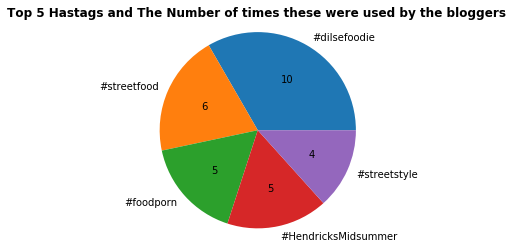

In [29]:
# ploting the pie chart with list_to_plot as values and top5_hastags[:,0] as labels
plt.pie(list_to_plot,labels = top5_hastags[:,0],autopct=absolute_value)
plt.title("Top 5 Hastags and The Number of times these were used by the bloggers",fontweight='bold')
plt.axis('equal')
plt.show()

# 3. You need to also calculate average followers : likes ratio for the obtained handles.Followers : Likes ratio is calculated as follows:

## 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

## 3.2 Calculate the average likes for a handle.

In [30]:
# intialising list_username_followers_likes which stores the username,followers and the likes 
list_username_followers_likes = []
# looping over the top5 handles
for username in top5_handles[:,0][::-1]:
    # searching the username in the serachbar
    Searchbartext(username)
    # finding the class element of the username by calling find_and_return_element_of_username() function
    usernamer = find_and_return_element_of_username(username)
    # clicking on the username
    usernamer.click()
    # stopping for 2 seconds
    time.sleep(2)
    # getting the number of followers by get_followers function()
    followers = get_followers()
    # stoping for 1 second
    time.sleep(1)
    # taking out the first 10 post elements
    posts = driver.find_elements_by_class_name("v1Nh3.kIKUG._bz0w")[:10]
    for post in posts:
        # initialising the count_of_likes
        count_of_likes = 0
        # clicking on the post one by one
        post.click()
        # implicitly waiting for 10 sec
        driver.implicitly_wait(10)
        # try block
        try:
            # finding the likes element class and getting the inner html
            html = driver.find_element_by_class_name('Nm9Fw').get_attribute('innerHTML')
            # getting ready the data with BeautifulSoup 
            data = BeautifulSoup(html,'html.parser')
            # getting the number of likes and converting it into int and adding it in count_of_likes
            count_of_likes+=int(data.find(class_="sqdOP yWX7d _8A5w5").span.text.replace(',',''))
        # except block if the post is igtv
        except NoSuchElementException:
            # finding the views class
            igtv = driver.find_element_by_class_name('vcOH2')
            # opening the views
            igtv.click()
            # getting the number of likes and converting it into int and adding it in count_of_likes
            count_of_likes+=int(driver.find_element_by_class_name('vJRqr').text.split(' ')[0].replace(",",""))
            # returning from the likes view to original view of igtv
            return0 = driver.find_element_by_class_name('QhbhU')
            return0.click()
        # closing the post window
        close = driver.find_element_by_class_name("Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG")
        close.click()
        # stopping for 1 sec
        time.sleep(1)
    # storing the username,followers, and the average count of likes by dividing it by 10
    list_username_followers_likes.append((username,followers,count_of_likes/10))

In [31]:
# printing the username, followers and the average likes
for handle in list_username_followers_likes:
    print(*handle)

food_lunatic 101334 104.3
delhifoodguide 104439 87.2
foodtalkindia 302778 72.7
dilsefoodie 657109 861.1
yourfoodlab 1459251 2600.6


## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [32]:
# initialising the list_of_handles and list_of_followers_ratio_average_likes
list_of_handles = []
list_of_followers_ratio_average_likes = []
# looping over list_username_followers_likes and appending the username in list_of_handles and the followers:average likes
# in list_of_followers_ratio_average_likes
for handle in list_username_followers_likes:
    list_of_handles.append(handle[0])
    list_of_followers_ratio_average_likes.append(handle[1]/handle[2])

In [33]:
# printing the usernames and the followers ration(:) average likes
for i in range(5):
    print(list_of_handles[i],list_of_followers_ratio_average_likes[i])

food_lunatic 971.5627996164909
delhifoodguide 1197.6949541284403
foodtalkindia 4164.759284731775
dilsefoodie 763.1041690860527
yourfoodlab 561.1208951780359


## 3.4 Create a bar graph to depict the above obtained information.

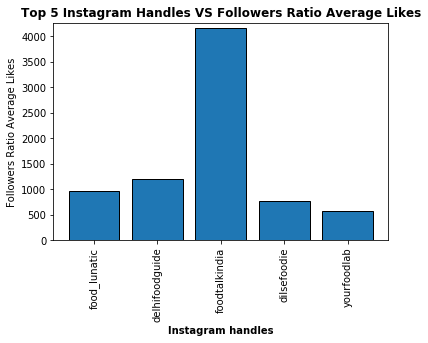

In [34]:
# plotting the bar graph
plt.bar(list_of_handles,list_of_followers_ratio_average_likes,edgecolor = 'black')
# displaying the title
plt.title('Top 5 Instagram Handles VS Followers Ratio Average Likes',fontweight="bold")
# displaying x-label
plt.xlabel('Instagram handles',fontweight='bold')
# displaying y-label
plt.ylabel('Followers Ratio Average Likes')
# doing the rotation=90 of x-axis labels
plt.xticks(rotation=90)
# setting the limit of y-axis
plt.ylim(0,max(list_of_followers_ratio_average_likes)+100)
# showing the bar graph
plt.show()

In [35]:
# closing the driver
driver.close()